# Julia: Crash Course and Solving ODEs
<br>
<div>

</div>
<br>

## Contents
1. [Julia Crash Course](#julia)<br>
    1.1. [Why Julia](#why-julia)<br>
    1.2. [Julia and Jupyter Notebooks](#jupyter)<br>
    1.3. [The Julia REPL](#repl)<br>
    1.4. [Arrays](#arrays)<br>
    1.5. [Functions, Methods, and Multiple Dispatch](#functions)<br>
    1.6. [Structs (or: Julia Objects)](#structs)<br>
    1.7. [Putting it All Together: Defining Structure and Behaviour in Julia](#structure)<br>
    1.8. [Control Flow: Loops and Conditionals](#control)<br>
    1.9. [Pkg.jl - The Julia Package Manager](#pkg)<br>
2. [DifferentialEquations.jl](#diffeq)<br>
    2.1. [Solving ODEs](#solving-odes)<br>
    2.2. [Plotting the Solution](#plotting)<br>
    2.3. [Configuring the Solver: Common Solver Options](#options)<br>
3. [Further Reading](#further-reading)

## 1. Julia Crash Course <a class="anchor" id="julia"></a>


### 1.1. Why Julia <a class="anchor" id="why-julia"></a>

- Historically, we might divide programming languages commonly used for scientific computing into so-called "high-level" and "low-level" languages:


| Language Type | Implementation | Type System | Syntax | Speed | Examples
| :- | :- | :- | :- | :- | :- |
| High-level | [Interpreted](https://en.wikipedia.org/wiki/Interpreter_(computing)) | [Dynamic](https://en.wikipedia.org/wiki/Type_system#Dynamic_type_checking_and_runtime_type_information) | Easy, modern | Painfully slow | Python, R, Mathematica
| Low-level | [Compiled](https://en.wikipedia.org/wiki/Compiled_language) | [Static](https://en.wikipedia.org/wiki/Type_system#Static_type_checking) | Hard, obscure | Blazing fast | Fortran, C, C++

- This divide gives rise to the dreaded [**two-language problem**](https://www.nature.com/articles/d41586-019-02310-3): scientific programmes are often prototyped in a high-level language, such as Python, but then have to be translated into a low-level language, such as C, when speed becomes important. If you've ever had to convert a Python for-loop into vectorised NumPy code, then you've already experienced the two-language problem first-hand.
<br>

- Julia aims to solve the two-language problem, giving scientists the flexibility to write code with the ease of Python while executing with the performance of Fortran or C, all inside one language.
<br>

- That is to say, Julia offers the best of both worlds:
    - it's ([JIT](https://en.wikipedia.org/wiki/Just-in-time_compilation)) **compiled**,
    - it's **dynamically typed**,
    - it has a clean **modern syntax**,
    - it's **exceptionally** [**fast**](https://julialang.org/benchmarks/).
<br><br>
- Despite seeing its [v1.0 release](https://julialang.org/blog/2018/08/one-point-zero/) less than five years ago, Julia has already achieved [widespread use](https://julialang.org/blog/2022/02/10years/) in the scientific community. One high profile example is the  [Climate Modeling Alliance (CliMA)](https://clima.caltech.edu/), who are building a new earth system model in Julia.

### 1.2. Julia and Jupyter Notebooks <a class="anchor" id="jupyter"></a>

- In this workshop, we'll stick mostly to Jupyter notebooks.
<br>

- With Julia already installed on your computer, the next thing you'll have to do is follow the instructions [here](https://juliahub.com/ui/Packages/IJulia/nfu7T/1.21.2) to install IJulia, which offers a Julia backend for Jupyter notebooks. 
<br>

- If you already have Jupyter installed, then just follow the instructions to point IJulia to your system Jupyter installation. Otherwise, you can allow IJulia to install Jupyter for you.

### 1.3. The Julia REPL <a class="anchor" id="repl"></a>

- While we'll stick to notebooks, [Julia's powerful REPL](https://docs.julialang.org/en/v1/stdlib/REPL/) is a key component of a typical Julia developer's workflow and still deserves a mention.
<br>

- Assuming you have Julia installed and the Julia executable is discoverable on your path, enter the Julia REPL by simply doing `julia` at the command line.
<br>

- Once in the REPL, you can directly type and execute Julia statements and expressions, useful for testing and exploration.
<br>

- Other invaluable features of the REPL include:
    - Type `?` to enter help mode.
    - Type `]` to enter Pkg mode, for installing packages and managing environments (more on this later).
    - Type `;` to enter shell mode, for executing shell commands.
    - Type `Ctrl + r` to search your REPL history.
    

### 1.4. Arrays <a class="anchor" id="arrays"></a>

- Unsurprisingly, given its emphasis on technical computing, Julia has a first-class array implementation: `Array`.
<br>

- It's a good idea to read the [documentation](https://docs.julialang.org/en/v1/manual/arrays/), but here we will give a very brief overview of what you need to get started.

#### 1.4.1. `Array` can have arbitrary dimensions

- In Julia, arrays can have arbitrary dimensions. You can think of an array as a finite n-dimensional grid, with an object placed at each gridpoint.

In [1]:
a = zeros(2, 3, 4)  # zeros is a useful constructor
typeof(a)

Array{Float64, 3}

In [2]:
a = zeros(2, 3)
typeof(a)

Matrix{Float64} (alias for Array{Float64, 2})

In [3]:
a = zeros(2)
typeof(a)

Vector{Float64} (alias for Array{Float64, 1})

In [4]:
a = zeros()
typeof(a)

Array{Float64, 0}

In [5]:
a

0-dimensional Array{Float64, 0}:
0.0

#### 1.4.2. `Array` is 1-indexed

- Unlike other programming languages you might be familiar with, Julia arrays are 1-indexed rather than 0-indexed.

In [6]:
a = rand(3)

3-element Vector{Float64}:
 0.5892752963071436
 0.15647601013738277
 0.9711098137663952

In [7]:
a[0]  # Attempt to get the element at position 0 of a

LoadError: BoundsError: attempt to access 3-element Vector{Float64} at index [0]

In [8]:
a[1]  # Get the first element of a

0.5892752963071436

#### 1.4.3. More General Array Indexing

- The general syntax for indexing into an n-dimensional array `A` is:

    `A[I_1, I_2, ..., I_n]`,

    where each `I_k` may be a scalar integer, an array of integers, or any other supported index (see the [docs]((https://docs.julialang.org/en/v1/manual/arrays/#man-supported-index-types)) for other supported indices).

In [9]:
a = rand(2, 3)

2×3 Matrix{Float64}:
 0.125764  0.1169    0.3178
 0.475564  0.885332  0.211962

In [10]:
a[1, 2]

0.11689996477055875

In [11]:
a[2, 1:2]  # 1:2 is a range object

2-element Vector{Float64}:
 0.4755641467097703
 0.8853323150798291

In [12]:
typeof(1:2)

UnitRange{Int64}

#### 1.4.4. Indexed Assignment
- As you might expect, arrays are mutable.
<br>

- Similar to array indexing, the general syntax for assigning values in an n-dimensional array `A` is:

    `A[I_1, I_2, ..., I_n] = X`,

    where each `I_k` may be a scalar integer, an array of integers, or any other supported index.

In [13]:
a = rand(2, 3)

2×3 Matrix{Float64}:
 0.913153   0.590675  0.185248
 0.0356142  0.902919  0.576893

In [14]:
a[1, 2] = 2
a

2×3 Matrix{Float64}:
 0.913153   2.0       0.185248
 0.0356142  0.902919  0.576893

- If any index `I_k` is itself an array, then the right hand side `X` must also be an array with the same shape as the result of indexing `A[I_1, I_2, ..., I_n]` or a vector with the same number of elements. 

In [15]:
size(a[1, [1,2]])  # Two-element vector

(2,)

In [16]:
size([3, 4])  # Also a two-element vector

(2,)

In [17]:
a[2, [1,2]] = [3, 4]  # Which means we can do this
a

2×3 Matrix{Float64}:
 0.913153  2.0  0.185248
 3.0       4.0  0.576893

- Finally, the element-wise assignment operator `.=` may be used to broadcast `X` across the selected locations:

    `A[I_1, I_2, ..., I_n] .= X`

In [18]:
a[:, 3] .= 5.0
a

2×3 Matrix{Float64}:
 0.913153  2.0  5.0
 3.0       4.0  5.0

#### 1.4.5. Array Literals

- Julia has some useful [array literal](https://docs.julialang.org/en/v1/manual/arrays/#man-array-literals) syntax.
<br>

- Often you will find yourself creating vectors (one-dimensional arrays) as literals, the elements of which are passed as comma-separated values between square brackets:

In [19]:
[1, 2, 3]

3-element Vector{Int64}:
 1
 2
 3

In [20]:
["Machine", "Learning"]

2-element Vector{String}:
 "Machine"
 "Learning"

- It is highly recommeded to consult the [docs](https://docs.julialang.org/en/v1/manual/arrays/#man-array-concatenation) for the full story, but Julia also has powerful and intuitive concatenation rules for array literals, giving rise to some nice array literal syntax like:

In [21]:
[1 2
 3 4]

2×2 Matrix{Int64}:
 1  2
 3  4

#### 1.4.6. Array Constructors

- For constructing and pre-allocating arrays, see the various [constructors](https://docs.julialang.org/en/v1/manual/arrays/#Construction-and-Initialization), such as `zeros`, `ones`, `rand`.

### 1.5. Functions, Methods, and Multiple Dispatch <a class="anchor" id="functions"></a>

- At a high level, functions in Julia are conceptually similar to functions from other languages: they map a tuple of inputs to return values, while also potentially modifying the program's state.
<br>

#### 1.5.1. Standard Function Definition Syntax 

- This is probably the form you'll see and use most often.

In [22]:
function f(x, y)
    return x + y
end

f (generic function with 1 method)

In [23]:
f(1, 2)

3

- Note that the `return` keyword is optional, since by default a function will return the value of the **last expression evaluated**. That said, I prefer to be as explicit as possible so I generally include it.
<br>

- By convention, functions which modify their arguments in-place have names ending in `!`.

In [24]:
function square_array!(a)
    a .= a.^2
    return nothing
end

square_array! (generic function with 1 method)

In [25]:
a = rand(2, 3)

2×3 Matrix{Float64}:
 0.729161  0.853163  0.680455
 0.261599  0.65259   0.272093

In [26]:
square_array!(a)  # returns nothing

In [27]:
a  # but a was modified in-place

2×3 Matrix{Float64}:
 0.531676   0.727887  0.46302
 0.0684339  0.425874  0.0740346

- For more information on defining functions, such as [optional arguments](https://docs.julialang.org/en/v1/manual/functions/#Optional-Arguments) and [keyword arguments](https://docs.julialang.org/en/v1/manual/functions/#Keyword-Arguments), see the [docs](https://docs.julialang.org/en/v1/manual/functions/).

#### 1.5.2. Methods

- Closely related to functions are methods.
<br>

- _A method defines one possible behaviour for a function, given the_ number _and_ types _of its arguments_.


In [28]:
function add(x, y)
    return x + y
end

function add(x, y, z)
    return x + y + z
end

add (generic function with 2 methods)

- You can call `methods` on a function to see its method table.

In [29]:
methods(add)

# 2 methods for generic function "add":
[1] add(x, y) in Main at In[28]:1
[2] add(x, y, z) in Main at In[28]:5

In [30]:
add(1, 2)

3

In [31]:
add(1, 2, 3)

6

- Conceptually, we have one function (addition) with many possible behaviours, depending on the number of inputs and their types (integers, floats, matrices, and so on).
<br>

- The first time you define a function with a given name, the function is created along with its first method. Each subsequent definition with the same function name then creates a new method of the same function.
<br>

- We can use **type annotations** to make our method definitions more specific. 

In [32]:
function add(X::Array, Y::Array)
    return X .+ Y
end

add (generic function with 3 methods)

In [33]:
methods(add)

# 3 methods for generic function "add":
[1] add(X::Array, Y::Array) in Main at In[32]:1
[2] add(x, y) in Main at In[28]:1
[3] add(x, y, z) in Main at In[28]:5

In [34]:
A = rand(2, 3)
B = rand(2, 3)
add(A, B)

2×3 Matrix{Float64}:
 0.683435  1.37785  1.11657
 0.419844  1.00781  1.10052

#### 1.5.3. Multiple Dispatch

- Given a single function with many methods, how does Julia choose which method to call?

> The choice of which method to execute when a function is applied is called dispatch. **Julia allows the dispatch process to choose which of a function's methods to call based on the number of arguments given, and on the types of all of the function's arguments**. This is different than traditional object-oriented languages, where dispatch occurs based only on the first argument, which often has a special argument syntax, and is sometimes implied rather than explicitly written as an argument. [c.f. Python classes and methods.] **Using all of a function's arguments to choose which method should be invoked, rather than just the first, is known as multiple dispatch**. 


- In particular, Julia will automatically select the **most specific** method matching the arguments provided.
<br>

- _Multiple dispatch is the core programming paradigm of the Julia language_.
<br>

- Used appropriately, multiple dispatch can lead to highly elegant, flexible, and composable code.

### 1.6. Structs (or: Julia Objects) <a class="anchor" id="structs"></a>

- The most common user-defined type in Julia is a [**composite type**](https://docs.julialang.org/en/v1/manual/types/#Composite-Types) or `struct`. This is the Julia equivalent of a `Class` in Python.

#### 1.6.1. Defining Structs

- Composite types are introduced with the `struct` keyword followed by a block of field names.

In [35]:
struct Foo
    bar
    baz
end

- That's it! (More or less...)

#### 1.6.2. Instantiating Structs

- To create a new object of a given type, simply apply the type name like a function.

In [36]:
foo = Foo("Machine", "Learning")

Foo("Machine", "Learning")

In [37]:
typeof(foo)

Foo

#### 1.6.3. Accessing the Fields of a Struct

- You can access the field names of a struct using the standard `foo.bar` notation.

In [38]:
foo.bar

"Machine"

In [39]:
foo.baz

"Learning"

#### 1.6.4 Structs are Not Mutable

- Composite objects declared with `struct` are **immutable**; they cannot be modified after construction.

In [40]:
foo.baz = "Intelligence"

LoadError: setfield!: immutable struct of type Foo cannot be changed

- **N.B.** An immutable object might contain mutable objects, such as arrays, as fields. Those mutable field values will remain mutable; only the fields of the immutable object itself cannot be changed to point to different objects.

In [41]:
struct ArrayStruct
    a::Array
end

array_struct = ArrayStruct(rand(2))
array_struct.a

2-element Vector{Float64}:
 0.6814432086845662
 0.6698389430756965

In [42]:
# Modify the mutable object
array_struct.a[1] = 3.0
array_struct.a

2-element Vector{Float64}:
 3.0
 0.6698389430756965

In [43]:
# Attempt to modify the field value itself
array_struct.a = [3.0, 4.0]

LoadError: setfield!: immutable struct of type ArrayStruct cannot be changed

- Why is it like this? Isn't this unnecessarily restrictive for the programmer?
<br>

- The main reason for structs to be immutable is to allow the compiler to effectively optimise your code. In particular, it allows your objects to be laid out efficiently in memory (e.g. stack allocated rather than heap).
<br>

- If you _really_ do need a mutable struct (you probably don't), you can simply declare one with the `mutable` keyword:

In [44]:
mutable struct MyMutableStruct
    a
end
m = MyMutableStruct("original value")
m.a

"original value"

In [45]:
m.a = "new value"
m.a

"new value"

### 1.7. Putting it All Together: Defining Structure and Behaviour in Julia <a class="anchor" id="structure"></a>

- Putting together the last two sections, you can think of structs as defining the _structure_ of your Julia programs and methods which dispatch on those structs as providing the _behaviour_.
<br>

- This is directly analogous to defining classes and methods in Python.

In [46]:
struct My2DVector
    x
    y
end

In [47]:
function add(a::My2DVector, b::My2DVector)
    return My2DVector(a.x + b.x, a.y + b.y)
end

add (generic function with 4 methods)

### 1.8. Control Flow: Loops and Conditionals <a class="anchor" id="control"></a>

- See the [docs](https://docs.julialang.org/en/v1/manual/control-flow/) for a much more complete discussion of control flow.

#### 1.8.1 The `for` Loop

- The most common loop construct in Julia is the `for` loop:

In [48]:
for i = 1:5
    println(i)
end

1
2
3
4
5


- You will often find yourself using range objects together with `for` loops. This is a very useful construct for generating sequences of numbers and takes the general form:

    ```julia
    a:b:c
    ```

    where `a` is the starting number, `c` is the ending number, and `b` is the stepsize. By default `b = 1`.    

- **N.B.** ranges in Julia are **inclusive**, i.e. the range includes `c`.
<br>
- The `for` loop can also iterate over the items of a container (e.g. `Array`, `Tuple`), not just a range object:

In [49]:
stuff = ["Machine", "Learning"]
for thing in stuff
    println(thing)
end

Machine
Learning


#### 1.8.2. Conditional Evaluation

- The standard `if`-`elseif`-`else` syntax in Julia is:

```julia
if x < y
    println("x is less than y")
elseif x > y
    println("x is greater than y")
else
    println("x is equal to y")
end
```

- Unlike other languages (e.g. Python), the value given to the conditional expression __must be a boolean__, i.e. `true` or `false`. In other words, there are no "truthy" and "falsy" values in Julia.

### 1.9. Pkg.jl - The Julia Package Manager <a class="anchor" id="pkg"></a>

- [Pkg.jl](https://pkgdocs.julialang.org/v1/) is Julia's built-in package manager.
<br>

- It's comparable to the combination of `pip` and `virtualenv`, or `conda`, in Python. Except it actually works.
<br>

- There are two ways to use Pkg.jl:
    1. [The Pkg REPL](https://pkgdocs.julialang.org/v1/repl/), which you can enter by simply typing `]` at the Julia REPL.
    2. [The Pkg API](https://pkgdocs.julialang.org/v1/api/), for when you want to interact with the package manager from a script or Jupyter notebook.
<br><br>

- Pkg.jl is built around the idea of environments, and an environment is defined by a `Project.toml` file (c.f. `requirements.txt` if you're using `pip` and `virtualenv` in Python).
<br>

In [50]:
using Pkg  # Need to import Pkg in order to use the API

#### 1.9.1. Activating an Environment

- The active environment determines what packages you can currently load and use in your code.
<br>

- To activate the environment in the current directory, do:

In [51]:
Pkg.activate(".")

  Activating project at `~/code/ML-DS-Workshop-23`


- If there is no `Project.toml` in the current directory, this will create a new environment.
<br>

- All further Pkg actions will then refer to the activated environment.

#### 1.9.2. Instantiating an Environment

- When using an existing environment for the first time, for example after you've cloned someone elses Git repo, you also need to download the packages.
<br>

- To do this, just instantiate the package after activating it:

In [52]:
Pkg.instantiate()

#### 1.9.3. Adding Packages

- One of the most common actions you'll take with Pkg is adding new packages. Fortunately, it's as easy as:

In [53]:
Pkg.add("DifferentialEquations")

┌ Warning: could not download https://pkg.julialang.org/registries
│   exception = Downloads.RequestError("https://pkg.julialang.org/registries", 6, "Could not resolve host: eu-central.pkg.julialang.org", Downloads.Response("https", "https://eu-central.pkg.julialang.org/registries", 301, "HTTP/2 301", ["server" => "Varnish", "retry-after" => "0", "location" => "https://eu-central.pkg.julialang.org/registries", "x-geo-continent" => "EU", "x-geo-country" => "DE", "x-geo-region" => "BY", "accept-ranges" => "bytes", "date" => "Sun, 19 Feb 2023 20:07:02 GMT", "via" => "1.1 varnish", "x-served-by" => "cache-muc13974-MUC", "x-cache" => "HIT", "x-cache-hits" => "0", "x-timer" => "S1676837223.704874,VS0,VE0", "content-length" => "0"]))
└ @ Pkg.Registry /cache/build/default-amdci4-6/julialang/julia-release-1-dot-8/usr/share/julia/stdlib/v1.8/Pkg/src/Registry/Registry.jl:68
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/code/ML-DS-W

## 2. DifferentialEquations.jl <a class="anchor" id="diffeq"></a>

- [DifferentialEquations.jl](https://diffeq.sciml.ai/stable/) is a comprehensive suite of algorithms for the numerical solution of differential equations in Julia.
<br>

- We've already installed the package, so now we just need to import it. This is most commonly done with the `using` keyword, although see [here](https://docs.julialang.org/en/v1/manual/code-loading/) for other options and the full story of code loading in Julia.

In [54]:
using DifferentialEquations

### 2.1. Solving ODEs <a class="anchor" id="solving-odes"></a>

- With the package installed and loaded, solving an ODE in Julia is a simple 3-step process.

#### Step 1: Define the RHS of your ODE

- For a standard ODE of the form $\dot u = f(u, t; p)$, where $u \in \mathbb R^n$, $t \in \mathbb R$, and $p \in \mathbb R^m$ are some parameters of the the ODE, we need to define $f$ as a Julia function.
<br>

- In particular, we define a function with signature `(u, p, t)` that returns a vector containing $\dot u$.

In [55]:
# Lorenz '63
function f(u, p, t)
    x, y, z = u  # You can unpack the ODE variables and parameters like this
    σ, β, ρ = p
    
    dx = σ * (y - x)
    dy = x * (ρ - z) - y
    dz = x * y - β * z
    
    return [dx, dy, dz]  # Return a vector
end

f (generic function with 2 methods)

#### Step 2: Set up the ODE Problem

- Given `f`, we now need to set up an `ODEProblem` object. See the [docs](https://docs.sciml.ai/DiffEqDocs/latest/basics/problem/) for more details.

In [56]:
u0 = rand(3)             # Initial conditions
tspan = (0.0, 10.0)      # Timespan of the integration
p = [10.0, 8 / 3, 28.0]  # Parameters (generally optional)

prob = ODEProblem(f, u0, tspan, p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: false
timespan: (0.0, 10.0)
u0: 3-element Vector{Float64}:
 0.5087143106577112
 0.7220387290925273
 0.554321660471579

#### Step 3: Solve the ODE Problem

- All that's left is to solve the ODE problem:

In [57]:
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 98-element Vector{Float64}:
  0.0
  0.037686027031711686
  0.06423640192671112
  0.10885438709916373
  0.15302988397674022
  0.20133061019692808
  0.2505553496183315
  0.30217418372626514
  0.3547847618321569
  0.407677873576059
  0.45247224835476085
  0.49906051472202
  0.5501392287184734
  ⋮
  8.895982054220877
  8.99879870769752
  9.114734498762507
  9.208280932224376
  9.314506017204021
  9.409788826491067
  9.533441320933024
  9.634056880993645
  9.748527973563217
  9.840770777437339
  9.942399632658445
 10.0
u: 98-element Vector{Vector{Float64}}:
 [0.5087143106577112, 0.7220387290925273, 0.554321660471579]
 [0.6649362036279258, 1.2791846113336978, 0.5220871061012304]
 [0.868104250729835, 1.793000621061993, 0.5164220785351178]
 [1.4274555626941074, 3.0612517145926113, 0.5741785858523176]
 [2.3766333536552793, 5.12949412971582, 0.8312677213101087

In [58]:
Array(sol)

3×98 Matrix{Float64}:
 0.508714  0.664936  0.868104  1.42746   …  -9.49332  -6.34628  -5.38271
 0.722039  1.27918   1.793     3.06125      -6.16419  -4.02947  -4.3589
 0.554322  0.522087  0.516422  0.574179     31.9224   27.618    24.962

#### Alternative: In-Place Updates

- So far we've defined and solved our problem in the out-of-place (OOP) form.
<br>

- For higher-dimensional problems it might be more efficient to define and solve the problem in the in-place (IIP) form.
<br>

- In this case the RHS function has the signature `(du, u, p, t)` with the vector `du` containing the derivatives which much be updated.

In [59]:
# Lorenz '63 (IIP)
function f!(du, u, p, t)
    x, y, z = u
    σ, β, ρ = p
    
    du[1] = σ * (y - x)
    du[2] = x * (ρ - z) - y
    du[3] = x * y - β * z
    
    return nothing
end

f! (generic function with 1 method)

- If you're not sure which approach is best for your problem, you can test out different approaches using the useful [BenchmarkTools](https://juliaci.github.io/BenchmarkTools.jl/stable/) package.

In [60]:
using BenchmarkTools
@benchmark solve(prob)  # experiment with this yourself

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  262.299 μs … 33.414 ms  ┊ GC (min … max):  0.00% … 98.45%
 Time  (median):     452.114 μs              ┊ GC (median):     0.00%
 Time  (mean ± σ):   478.653 μs ±  1.386 ms  ┊ GC (mean ± σ):  15.00% ±  5.11%

  ▃▆█▇▅▄▃▂▂▁    ▁      ▂▆█▇▇▆▅▄▂▁▁                             ▂
  █████████████▇█▇▇▇▇▆▇█████████████████▇▆▇▆▆▄▆▄▅▅▅▄▄▃▅▅▆▆▅▆▆▆ █
  262 μs        Histogram: log(frequency) by time       751 μs <

 Memory estimate: 615.08 KiB, allocs estimate: 7744.

### 2.2. Plotting the Solution <a class="anchor" id="plotting"></a>

- DifferentialEquations.jl provides recipes for plotting ODE solutions using the Plots.jl package.
<br>

- First, make sure the Plots.jl package is installed and imported.

In [61]:
Pkg.add("Plots")
using Plots

   Resolving package versions...
  No Changes to `~/code/ML-DS-Workshop-23/Project.toml`
  No Changes to `~/code/ML-DS-Workshop-23/Manifest.toml`
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1664
[ Info: GR


- Then, plotting trajectories is as simple as calling `plot` with the solution object (this is an example of multiple dispatch!).

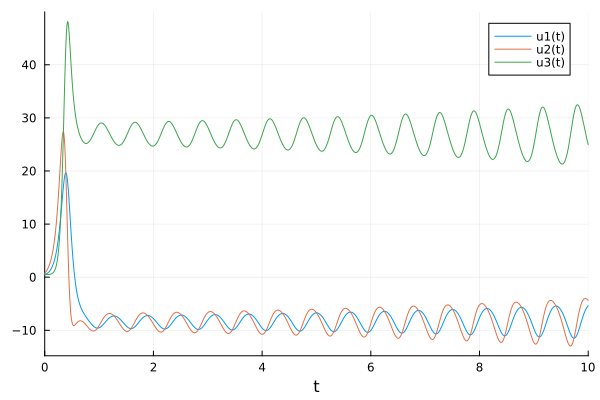

In [62]:
plot(sol)

### 2.3. Configuring the Solver: Common Solver Options <a class="anchor" id="options"></a>

- When we solved our ODE problem just now, we simply did `solve(prob)` and allowed DifferentialEquations.jl to choose sensible defaults for the ODE solver algorithm and various other parameters.
<br>

- In practice, we often want more control over the solver.


#### 2.3.1. Specifying the Solver Algorithm

- A huge number of [ODE solvers](https://diffeq.sciml.ai/stable/solvers/ode_solve/) are implemented (or interfaced) in DifferentialEquations.jl.
<br>

- To specify a specific algorithm, simply pass it as the second argument to `solve`.

In [63]:
solve(prob, Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 98-element Vector{Float64}:
  0.0
  0.037686027031711686
  0.06423640192671112
  0.10885438709916373
  0.15302988397674022
  0.20133061019692808
  0.2505553496183315
  0.30217418372626514
  0.3547847618321569
  0.407677873576059
  0.45247224835476085
  0.49906051472202
  0.5501392287184734
  ⋮
  8.895982054220877
  8.99879870769752
  9.114734498762507
  9.208280932224376
  9.314506017204021
  9.409788826491067
  9.533441320933024
  9.634056880993645
  9.748527973563217
  9.840770777437339
  9.942399632658445
 10.0
u: 98-element Vector{Vector{Float64}}:
 [0.5087143106577112, 0.7220387290925273, 0.554321660471579]
 [0.6649362036279258, 1.2791846113336978, 0.5220871061012304]
 [0.868104250729835, 1.793000621061993, 0.5164220785351178]
 [1.4274555626941074, 3.0612517145926113, 0.5741785858523176]
 [2.3766333536552793, 5.12949412971582, 0.8312677213101087]
 [4.151129396529686, 8.911530214591709, 1.757143519332517]

#### 2.3.2. Save Times

- By default, an adaptive step size algorithm will simply save the result at the times where it stopped.
<br>

- Often, you'll want the solver to output the solution at predefined times. To do this, use the keyword argument `saveat`.

In [64]:
sol = solve(prob, Tsit5(), saveat = 0.1)

retcode: Success
Interpolation: 1st order linear
t: 101-element Vector{Float64}:
  0.0
  0.1
  0.2
  0.3
  0.4
  0.5
  0.6
  0.7
  0.8
  0.9
  1.0
  1.1
  1.2
  ⋮
  8.9
  9.0
  9.1
  9.2
  9.3
  9.4
  9.5
  9.6
  9.7
  9.8
  9.9
 10.0
u: 101-element Vector{Vector{Float64}}:
 [0.5087143106577112, 0.7220387290925273, 0.554321660471579]
 [1.290287131178819, 2.757167631926005, 0.5524873408287414]
 [4.0882489439380105, 8.779332748412033, 1.7148123562546989]
 [12.03742676703115, 23.366550415821692, 12.789222000014885]
 [19.476530187090646, 15.587049434511094, 46.176436031220604]
 [6.140671466014411, -8.422937389045765, 37.59042300742775]
 [-3.3335628388869214, -8.49508194355623, 28.47182382596138]
 [-6.459890413760127, -8.373989358870045, 25.605363594346592]
 [-8.047969129956309, -9.46675896785113, 25.35173897045789]
 [-9.25975269738461, -10.1329600617924, 27.024785062296726]
 [-9.525785146800454, -9.127452464048178, 28.82899192936806]
 [-8.63103408832565, -7.44044056922193, 28.6713886541757

- This does **not** force the adaptive solver to stop at those times. Instead, the solution at intermediate times is calculated using an efficient interpolation function that preserves the order of the solution.

#### 2.3.3. Error Tolerances

- For an adaptive stepsize algorithm, the stepsize is controlled by the requirement that a normalised error estimate remains below a certain threshold.
<br>

- In particular, we require that the normalised error satisfies componentwise

$$\mathrm{err_i} \leq \mathrm{abstol_i} + \max(|y_{0i}|, |y_{1i}|) \cdot \mathrm{reltol_i},$$

where $|y_{0i}|$ is the initial value, $|y_{1i}|$ is the solver's estimate of the solution, $\mathrm{abstol_i}$ is the *absolute tolerance* and $\mathrm{reltol_i}$ is the *relative tolerance*.
<br>

- The stepping behaviour is therefore determined by our choice of $\mathrm{abstol_i}$ and $\mathrm{reltol_i}$.
<br>

- The relative tolerance scales with the solution, so you can interpret a relative tolerance of `1e-3` as meaning, roughly, that the solution is (locally) correct to 3 digits.
<br>

- On the other hand, the absolute tolerance controls the (local) error of the solution around zero.
<br>

- The default values are $10^{-3}$ and $10^{-6}$ for the relative and absolute tolerance, respectively. We can change these values using the `abstol` and `reltol` keyword arguments to `solve`:
<br>

In [65]:
solve(prob, Tsit5(), reltol = 1e-6, abstol = 1e-6)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 357-element Vector{Float64}:
  0.0
  0.01171120253523229
  0.019655971479271093
  0.03155141883721953
  0.043081167285799936
  0.05682376828949389
  0.0712937017581904
  0.08721695537898376
  0.10390774044374079
  0.1212740209942651
  0.1388726513374344
  0.15650075826327037
  0.17394658531577445
  ⋮
  9.75263378400763
  9.776786255620753
  9.799972031354022
  9.822493790302271
  9.844691124205653
  9.86692087104853
  9.889507309181655
  9.912738741790273
  9.936865071336097
  9.962223531456592
  9.989588893818087
 10.0
u: 357-element Vector{Vector{Float64}}:
 [0.5087143106577112, 0.7220387290925273, 0.554321660471579]
 [0.5411668462027668, 0.8810296299793018, 0.5421217017903961]
 [0.5714904015894514, 0.994838873331802, 0.5348564347524721]
 [0.6292710338252848, 1.1777135851374485, 0.5257827096021793]
 [0.6996597226099417, 1.3731565360536855, 0.5194749539727002]
 [0.8029929139282529, 1.6355991531473006, 0.5160

## 3. Further Reading <a class="anchor" id="further-reading"></a>

1. [Julia Manual](https://docs.julialang.org/en/v1/)
2. [Julia Cheat Sheet](https://cheatsheet.juliadocs.org/)
3. [Julia Performance Tips](https://docs.julialang.org/en/v1/manual/performance-tips/)
4. [DifferentialEquations.jl docs](https://docs.sciml.ai/DiffEqDocs/stable/)